# Data Wrangling and Analyzing

In this project, we'll gather, assess, and clean some Tweeter data then act on it through analysis, visualization and/or modeling.

## Table of Contents
- [Gather](#gather)
- [Access](#access)
- [Clean](#clean)
- [Analysis](#analysis)
- [Conclusion](#conclusion)

<a id='gather'></a>
## Gather

In [1]:
# Import necessary libraries
import pandas as pd
import requests
import tweepy

Load `twitter-archive-enhanced.csv` file.

In [2]:
df_tweets = pd.read_csv('twitter-archive-enhanced.csv')

Download `image_predictions.tsv` file using requests.

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

In [4]:
# Check status of response
r.status_code

200

In [5]:
# Write response to file
# with open('image_predictions.tsv', 'w+') as file:
#     file.write(r.text)    

In [6]:
df_images = pd.read_csv('image_predictions.tsv', sep='\t')

Gather tweeter information with tweepy.

In [7]:
# Connect to tweepy
# with open('keys.txt', 'r') as file:
#     api_key = file.readline().split()[2]
#     api_secret = file.readline().split()[2]
#     access_token = file.readline().split()[2]
#     access_secret = file.readline().split()[2]
    
# auth = tweepy.OAuthHandler(api_key, api_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit = True)

In [8]:
# Download tweet data and save to tweet_json.txt
import json

# file = open('tweet_json.txt', 'w+')
# count = 0
# for tweet_id in df['tweet_id']:
#     count = count + 1
#     print('{count} / 2356, {id}'.format(count=count, id=tweet_id))
#     try:
#         file.write(json.dumps(api.get_status(id=tweet_id)._json) + '\n')
#     except:
#         print('Deleted: ', tweet_id)
#         continue
# file.close()

In [9]:
# Extract retweet count and favorite count of each tweet
likes = []
with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id_str']
        retweet = tweet['retweet_count'] 
        favorite = tweet['favorite_count']
      
        likes.append({'tweet_id': tweet_id,
                        'retweet_count': retweet,
                        'favorite_count':favorite})
df_likes = pd.DataFrame(likes, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

<a id='access'></a>
## Access

Now we have 3 files dataframes on hand, `df_tweets`, `df_images`, and `df_likes`.

In [10]:
df_tweets.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
df_tweets.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
356,830583320585068544,NaN,NaN,2017-02-12 01:04:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lilly. She just parallel barked. Kindl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
2336,666273097616637952,NaN,NaN,2015-11-16 15:14:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can take selfies 11/10 https://t.co/ws2AMaNwPW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666273097...,11,10,None,None,None,None,None


In [12]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
df_tweets.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
sum(df_tweets.tweet_id.duplicated())

0

In [15]:
df_tweets.rating_numerator.sort_values()

315        0
1016       0
2335       1
2261       1
2338       1
        ... 
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

In [16]:
df_tweets.query('rating_numerator == 1776')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [17]:
df_tweets.rating_denominator.sort_values()

313       0
2335      2
516       7
1576     10
1575     10
       ... 
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

In [18]:
df_tweets.query('rating_denominator == 0 or rating_denominator == 2 or rating_denominator == 7')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [19]:
df_tweets[df_tweets.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [20]:
df_tweets[df_tweets.name == "None"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


In [21]:
df_images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [22]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
df_images.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1554,793180763617361921,https://pbs.twimg.com/media/CwHxsdYVMAAqGCJ.jpg,1,Lakeland_terrier,0.266824,True,Irish_terrier,0.218783,True,Airedale,0.132960,True
888,699079609774645248,https://pbs.twimg.com/media/CbOhMUDXIAACIWR.jpg,3,schipperke,0.667324,True,Chesapeake_Bay_retriever,0.119550,True,kelpie,0.097600,True
1019,710140971284037632,https://pbs.twimg.com/media/Cdrtcr-W4AAqi5H.jpg,1,Pekinese,0.953170,True,papillon,0.019517,True,Japanese_spaniel,0.005821,True


In [24]:
sum(df_images.tweet_id.duplicated())

0

In [25]:
df_images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [26]:
df_likes.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7305,34812
1,892177421306343426,5457,30164
2,891815181378084864,3598,22706
3,891689557279858688,7490,38065
4,891327558926688256,8051,36342


In [27]:
sum(df_likes.duplicated())

0

In [28]:
df_likes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2331 non-null   object
 1   retweet_count   2331 non-null   int64 
 2   favorite_count  2331 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


In [29]:
df_likes.describe()

,retweet_count,favorite_count
count,2331.000000,2331.000000
mean,2569.824539,7269.266409
std,4346.939571,11291.352969
min,1.000000,0.000000
25%,521.500000,1258.000000
50%,1197.000000,3149.000000
75%,2975.000000,8885.500000
max,73712.000000,149541.000000


### Quality

##### `df_tweets` table
- ~~Erroneous datatypes (`tweet_id`, `in_reply_to_status_id`, `in_reply_to_user_id`, `timestamp`, `retweeted_status_id`, `retweeted_status_user_id`, `retweet_status_timestamp columns`)~~
- ~~Missing information on `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, and `retweet_status_timestamp`~~
- ~~`rating_numerators` and `rating_denominators` are not matching the rating given in `text`~~
- ~~Rating numerators having very large range, some are not actual ratings (e.g. 1776 is not rating for a dog but the year of Declaration of Independence of the United States)~~
- ~~745 dogs are named "None", some are named "a"~~
- ~~`rating_numerator` and `rating_denominator` are wrong for `tweet_id` '666287406224695296', it should be 9/10 instead of 1/2~~
- ~~`rating_numerator` is wrong for `tweet_id` '883482846933004288', it should be 13.5 instead of 5~~
- ~~`rating_numerator` and `rating_denominator` are wrong for `tweet_id` '810984652412424192', 24/7 is not a rating. There is no rating for this dog~~
- ~~Some of the tweets are not original tweets~~
- ~~Some of the tweets contain videos instead of images~~

##### `df_images` table
- ~~Erroneous datatype (`tweet_id`)~~
- ~~Mix use of upper and lower cases first letters of prediction (p1, p2, p3)~~

##### `df_likes` table
- ~~Number of entries does not match number of entries of `df_tweets` - there are some deleted tweets~~
- ~~Erroneous datatype (`retweet_count`, `favorite_count`)~~

### Tidiness

##### `df_tweets` table
- ~~Four columns of dog stages~~
- ~~Retweet counts and favorite counts should be part of the `df_tweets` table~~
- ~~Ratings are not standarized due to different denominators~~

##### `df_likes` table
- ~~Retweet count and favorite count are similar ways to calculate how popular a dog is~~

##### all tables
- ~~`df_tweets`, `df_images`, and `df_likes` should be part of the same table~~

<a id='clean'></a>
## Clean

In [30]:
# Make copies of all three dataframes
tweets_clean = df_tweets.copy()
images_clean = df_images.copy()
likes_clean = df_likes.copy()

### Quality

#### `tweets`: Some of the tweets are not original tweets

##### Define

Since we only care about original tweets with images, we are dropping all the retweets.

##### Code

In [31]:
# Make a mask of all tweets with 'in_reply_to_user_id' (meaning it's a reply), 
# 'retweeted_status_id' (meaning it's a retweet), and withough 'expanded_urls'
# (meaning it does not contain images)

mask = (tweets_clean['in_reply_to_user_id'].notnull()) | (tweets_clean['retweeted_status_id'].notnull())

In [32]:
tweets_clean.drop(tweets_clean[mask].index, axis = 0, inplace=True)

In [33]:
# Remove in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, 
# retweeted_status_timestamp because these rows have been emptied
tweets_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
                           'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

##### Test

In [34]:
tweets_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [35]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


#### `tweets`: Some of the tweets contain videos instead of images

##### Define

Remove all tweets without an expanded_urls or expanded_urls contains the word 'vine'

##### Code

In [36]:
# Find all the expanded_urls that are either null or contains the word "twitter"
mask = ~((tweets_clean['expanded_urls'].notnull()) & (tweets_clean['expanded_urls'].str.contains('twitter', regex=False)))

In [37]:
tweets_clean.drop(tweets_clean[mask].index, axis = 0, inplace=True)

##### Test

In [38]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2000 non-null   int64 
 1   timestamp           2000 non-null   object
 2   source              2000 non-null   object
 3   text                2000 non-null   object
 4   expanded_urls       2000 non-null   object
 5   rating_numerator    2000 non-null   int64 
 6   rating_denominator  2000 non-null   int64 
 7   name                2000 non-null   object
 8   doggo               2000 non-null   object
 9   floofer             2000 non-null   object
 10  pupper              2000 non-null   object
 11  puppo               2000 non-null   object
dtypes: int64(3), object(9)
memory usage: 203.1+ KB


In [39]:
tweets_clean[tweets_clean['expanded_urls'].str.contains('vine')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [40]:
tweets_clean[tweets_clean['expanded_urls'].isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### `tweets_clean`: Erroneous datatypes (`tweet_id`, `in_reply_to_status_id`, `in_reply_to_user_id`, `timestamp`,  `retweeted_status_id`, `retweeted_status_user_id`, `retweet_status_timestamp` columns)

##### Define

Change `tweet_id` to string, change `timestamp` to datetime

##### Code

In [41]:
tweets_clean.tweet_id = tweets_clean.tweet_id.astype(str)
tweets_clean.timestamp = pd.to_datetime(tweets_clean.timestamp)

##### Test

In [42]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2000 non-null   object             
 1   timestamp           2000 non-null   datetime64[ns, UTC]
 2   source              2000 non-null   object             
 3   text                2000 non-null   object             
 4   expanded_urls       2000 non-null   object             
 5   rating_numerator    2000 non-null   int64              
 6   rating_denominator  2000 non-null   int64              
 7   name                2000 non-null   object             
 8   doggo               2000 non-null   object             
 9   floofer             2000 non-null   object             
 10  pupper              2000 non-null   object             
 11  puppo               2000 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

#### `images_clean`: Erroneous datatype (`tweet_id`)

##### Define

Change `tweet_id` to string

##### Code

In [43]:
images_clean.tweet_id = images_clean.tweet_id.astype(str)

##### Test

In [44]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### `likes_clean`: Erroneous datatype (`retweet_count`, `favorite_count`)

##### Define

Change `retweet_count` and `favorite_count` to int

##### Code

In [45]:
likes_clean.retweet_count = likes_clean.retweet_count.astype(int)
likes_clean.favorite_count = likes_clean.favorite_count.astype(int)

##### Test

In [46]:
likes_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2331 non-null   object
 1   retweet_count   2331 non-null   int32 
 2   favorite_count  2331 non-null   int32 
dtypes: int32(2), object(1)
memory usage: 36.5+ KB


### Tidiness

#### `tweets_clean`: Four columns of dog stages

##### Define

Merge the `doggo`, `floofer`, `pupper`, and `puppo` columns to a `dog_stages` column.


##### Code

In [47]:
# Replace 'None' and NaN with an empty string for columns 'doggo', 
# 'floofer', 'pupper' and 'puppo'

import numpy as np

tweets_clean['doggo'].replace('None', '', inplace=True)
tweets_clean['doggo'].replace(np.NaN, '', inplace=True)
tweets_clean['floofer'].replace('None', '', inplace=True)
tweets_clean['floofer'].replace(np.NaN, '', inplace=True)
tweets_clean['pupper'].replace('None', '', inplace=True)
tweets_clean['pupper'].replace(np.NaN, '', inplace=True)
tweets_clean['puppo'].replace('None', '', inplace=True)
tweets_clean['puppo'].replace(np.NaN, '', inplace=True)

In [48]:
# Extract information from tweets_clean['text'] to see if dog stage is mentioned
tweets_clean['dog_stages'] = tweets_clean['text'].str.extract('(doggo|floofer|pupper|puppo)', expand = True)

In [49]:
tweets_clean['dog_stages'].value_counts()

pupper     222
doggo       73
puppo       28
floofer      3
Name: dog_stages, dtype: int64

In [50]:
# Combine dog stages - some dogs have multiple stages
tweets_clean['dog_stages'] = tweets_clean['doggo'] + tweets_clean['floofer'] + tweets_clean['pupper'] + tweets_clean['puppo']
tweets_clean.loc[tweets_clean['dog_stages'] == 'doggopupper', 'dog_stages'] = 'doggo, pupper'
tweets_clean.loc[tweets_clean['dog_stages'] == 'doggopuppo', 'dog_stages'] = 'doggo, puppo'
tweets_clean.loc[tweets_clean['dog_stages'] == 'doggofloofer', 'dog_stages'] = 'doggo, floofer'

In [51]:
# Drop the original 'doggo','floofer','pupper','puppo' columns
tweets_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace = True)

##### Test

In [52]:
tweets_clean['dog_stages'].value_counts()

                  1692
pupper             203
doggo               66
puppo               22
doggo, pupper        8
floofer              7
doggo, floofer       1
doggo, puppo         1
Name: dog_stages, dtype: int64

#### `likes_clean`: `retweet_count` and `favorite_count` are similar ways to calculate how popular a dog is

##### Define

Make an column named `likes` as the sum of `retweet_count` and `favorite_count` 


##### Code

In [53]:
likes_clean['likes'] = likes_clean['retweet_count'] + likes_clean['favorite_count']

##### Test

In [54]:
likes_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2331 non-null   object
 1   retweet_count   2331 non-null   int32 
 2   favorite_count  2331 non-null   int32 
 3   likes           2331 non-null   int32 
dtypes: int32(3), object(1)
memory usage: 45.7+ KB


#### `likes_clean`: Retweet counts and favorite counts should be part of the `tweets_clean` table

##### Define

Merge `likes_clean` and `tweets_clean`


##### Code

In [55]:
tweets_clean = pd.merge(tweets_clean, likes_clean, how='left', on='tweet_id')

In [56]:
# Null entries for retweet and favorite counts are due to deleted tweets
tweets_clean['retweet_count'] = tweets_clean['retweet_count'].fillna(0)
tweets_clean['favorite_count'] = tweets_clean['favorite_count'].fillna(0)
tweets_clean['likes'] = tweets_clean['likes'].fillna(0)

##### Test

In [57]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2000 non-null   object             
 1   timestamp           2000 non-null   datetime64[ns, UTC]
 2   source              2000 non-null   object             
 3   text                2000 non-null   object             
 4   expanded_urls       2000 non-null   object             
 5   rating_numerator    2000 non-null   int64              
 6   rating_denominator  2000 non-null   int64              
 7   name                2000 non-null   object             
 8   dog_stages          2000 non-null   object             
 9   retweet_count       2000 non-null   float64            
 10  favorite_count      2000 non-null   float64            
 11  likes               2000 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64

#### `tweets_clean`: `rating_numerators` and `rating_denominators` are not matching the rating given in `text`.

##### Define

Extract numbers from text and rewrite the `rating_numerator` and `rating_denominator` column.

##### Code

In [58]:
# Extract "num/num" from tweets_clean.text
tweets_clean['rating'] = tweets_clean.text.str.extract('(\d+\.?\d*\/\d*\.?\d+)')

In [59]:
tweets_clean['rating'].unique()

array(['13/10', '12/10', '14/10', '13.5/10', '11/10', '6/10', '10/10',
       '0/10', '84/70', '24/7', '9.75/10', '5/10', '11.27/10', '3/10',
       '7/10', '8/10', '9/10', '4/10', '165/150', '1776/10', '9/11',
       '204/170', '4/20', '50/50', '99/90', '80/80', '45/50', '60/50',
       '44/40', '121/110', '7/11', '11.26/10', '2/10', '144/120', '88/80',
       '1/10', '420/10', '1/2'], dtype=object)

In [60]:
ratings = tweets_clean['rating'].str.split('/', expand = True)

In [61]:
# Reassign rating_numerator and rating_denominator 
tweets_clean['rating_numerator'] = ratings[0]
tweets_clean['rating_denominator'] = ratings[1]

In [62]:
# Change type of rating_numerator and rating_denominator from string to float
tweets_clean.rating_numerator = tweets_clean.rating_numerator.astype(float)
tweets_clean.rating_denominator = tweets_clean.rating_denominator.astype(float)

In [63]:
tweets_clean.drop(columns=['rating'], inplace=True)

#### Test

In [64]:
tweets_clean.rating_numerator.sort_values()

246        0.0
1979       1.0
1982       1.0
1906       1.0
1742       1.0
         ...  
1449     144.0
682      165.0
867      204.0
1725     420.0
746     1776.0
Name: rating_numerator, Length: 2000, dtype: float64

In [65]:
tweets_clean.rating_denominator.sort_values()

1979      2.0
400       7.0
0        10.0
1340     10.0
1339     10.0
        ...  
966      90.0
1317    110.0
1449    120.0
682     150.0
867     170.0
Name: rating_denominator, Length: 2000, dtype: float64

#### `tweets_clean`: Ratings are not standarized

##### Define

Add a rating column with standarized rating

##### Code

In [66]:
tweets_clean['rating'] = tweets_clean['rating_numerator']/tweets_clean['rating_denominator']

##### Test

In [67]:
tweets_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,likes,rating
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,,7305.0,34812.0,42117.0,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,,5457.0,30164.0,35621.0,1.3
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,,3598.0,22706.0,26304.0,1.2
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,,7490.0,38065.0,45555.0,1.3
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,,8051.0,36342.0,44393.0,1.2


#### `tweets_clean`: Rating numerators having very large range, some are not actual ratings (e.g. 1776 is not rating for a dog but the year of Declaration of Independence of the United States)

##### Define

Inspect outlier `rating_numerators` and deicde if deletion is needed.

##### Code

In [68]:
tweets_clean.query('rating_numerator == 0')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,likes,rating
246,835152434251116546,2017-02-24 15:40:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,0.0,10.0,None,,2861.0,21618.0,24479.0,0.0


In [69]:
# rating_numerator == 0 is a tweet about plagiarism, remove
tweets_clean.drop(tweets_clean[tweets_clean.rating_numerator == 0].index, axis = 0, inplace=True)

In [70]:
tweets_clean.query('rating_numerator == 1776')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,likes,rating
746,749981277374128128,2016-07-04 15:00:45+00:00,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10.0,Atticus,,2361.0,4927.0,7288.0,177.6


In [71]:
# 1776 is not rating for a dog but the year of Declaration of Independence of the United States
tweets_clean.drop(tweets_clean[tweets_clean.rating_numerator == 1776].index, axis = 0, inplace=True)

In [72]:
tweets_clean.query('rating_numerator == 24 and rating_denominator == 7')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,likes,rating
400,810984652412424192,2016-12-19 23:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24.0,7.0,Sam,,1387.0,5198.0,6585.0,3.428571


In [73]:
# 24/7 is not rating for a dog
tweets_clean.drop(tweets_clean[tweets_clean.rating_numerator == 24].index, axis = 0, inplace=True)

In [74]:
tweets_clean.query('rating_denominator == 2')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,likes,rating
1979,666287406224695296,2015-11-16 16:11:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1.0,2.0,an,,57.0,130.0,187.0,0.5


In [75]:
# The correct rating for this tweet is 9/10 instead of 1/2
tweets_clean.drop(tweets_clean[tweets_clean.rating_denominator == 2].index, axis = 0, inplace=True)

In [76]:
tweets_clean.rating.sort_values()

1742     0.1
1982     0.1
1530     0.1
1906     0.1
1433     0.2
        ... 
37       1.4
169      1.4
67       1.4
215      1.4
1725    42.0
Name: rating, Length: 1996, dtype: float64

In [77]:
tweets_clean.query('rating == 42')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,likes,rating
1725,670842764863651840,2015-11-29 05:52:33+00:00,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420.0,10.0,None,,7882.0,22787.0,30669.0,42.0


In [78]:
# This is not a tweet about dogs
tweets_clean.drop(tweets_clean[tweets_clean.rating == 42].index, axis = 0, inplace=True)

#### Test

In [79]:
tweets_clean.query('rating_numerator == 0 or rating_numerator == 1776 or rating_denominator == 2 or rating_denominator == 7 or rating == 42')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,likes,rating


In [80]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1995 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1995 non-null   object             
 1   timestamp           1995 non-null   datetime64[ns, UTC]
 2   source              1995 non-null   object             
 3   text                1995 non-null   object             
 4   expanded_urls       1995 non-null   object             
 5   rating_numerator    1995 non-null   float64            
 6   rating_denominator  1995 non-null   float64            
 7   name                1995 non-null   object             
 8   dog_stages          1995 non-null   object             
 9   retweet_count       1995 non-null   float64            
 10  favorite_count      1995 non-null   float64            
 11  likes               1995 non-null   float64            
 12  rating              1995 non-null 

#### `tweets`: 745 dogs are named "None", some are named "a"

##### Define

Change dog names from "None"/"a" to empty string.

##### Code

In [81]:
tweets_clean['name'].replace('None', '', inplace=True)
tweets_clean['name'].replace('a', '', inplace=True)

##### Test

In [82]:
tweets_clean['name'].value_counts()

           605
Charlie     11
Oliver      10
Cooper      10
Lucy        10
          ... 
Travis       1
Nollie       1
Rambo        1
Tove         1
Andy         1
Name: name, Length: 934, dtype: int64

In [83]:
sum(tweets_clean['name'].isnull())

0

#### `images_clean`: Mix use of upper and lower cases first letters of prediction (p1, p2, p3)

##### Define

Change every string in `p1`, `p2`, `p3` to lower case

##### Code

In [84]:
images_clean['p1'] = images_clean['p1'].str.lower()
images_clean['p2'] = images_clean['p2'].str.lower()
images_clean['p3'] = images_clean['p3'].str.lower()

##### Test

In [85]:
images_clean.p1.str.islower().value_counts()

True    2075
Name: p1, dtype: int64

In [86]:
images_clean.p2.str.islower().value_counts()

True    2075
Name: p2, dtype: int64

In [87]:
images_clean.p3.str.islower().value_counts()

True    2075
Name: p3, dtype: int64

### Tidiness

#### `tweets_clean`, `images_clean`, and `likes_clean` should be part of the same table

##### Define

Merge `tweets_clean` and `images_clean`.

##### Code

In [88]:
twitter_archive_master = pd.merge(tweets_clean, images_clean, how='left', on='tweet_id')

In [89]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1995 entries, 0 to 1994
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1995 non-null   object             
 1   timestamp           1995 non-null   datetime64[ns, UTC]
 2   source              1995 non-null   object             
 3   text                1995 non-null   object             
 4   expanded_urls       1995 non-null   object             
 5   rating_numerator    1995 non-null   float64            
 6   rating_denominator  1995 non-null   float64            
 7   name                1995 non-null   object             
 8   dog_stages          1995 non-null   object             
 9   retweet_count       1995 non-null   float64            
 10  favorite_count      1995 non-null   float64            
 11  likes               1995 non-null   float64            
 12  rating              1995 non-null 

In [90]:
# Check null values from `images_clean`
twitter_archive_master[twitter_archive_master.jpg_url.isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
32,885518971528720385,2017-07-13 15:19:09+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,https://twitter.com/4bonds2carbon/status/88551...,14.0,10.0,,,3230.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,884247878851493888,2017-07-10 03:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,https://twitter.com/kaijohnson_19/status/88396...,13.0,10.0,,,17592.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,878604707211726852,2017-06-24 13:24:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Martha is stunning how h*ckin dare you. 13/10 ...,https://twitter.com/bbcworld/status/8785998685...,13.0,10.0,,,6155.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,876537666061221889,2017-06-18 20:30:39+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I can say with the pupmost confidence that the...,https://twitter.com/mpstowerham/status/8761629...,14.0,10.0,,,4111.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,875097192612077568,2017-06-14 21:06:43+00:00,"<a href=""http://twitter.com/download/iphone"" r...",You'll get your package when that precious man...,https://twitter.com/drboondoc/status/874413398...,13.0,10.0,,,5317.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,871102520638267392,2017-06-03 20:33:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,https://twitter.com/animalcog/status/871075758...,14.0,10.0,,doggo,4856.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,866720684873056260,2017-05-22 18:21:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",He was providing for his family 13/10 how dare...,https://twitter.com/nbcnews/status/86645871888...,13.0,10.0,,,4275.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,855857698524602368,2017-04-22 18:55:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...","HE'S LIKE ""WAIT A MINUTE I'M AN ANIMAL THIS IS...",https://twitter.com/perfy/status/8558573181681...,13.0,10.0,,,1937.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,855818117272018944,2017-04-22 16:18:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I HEARD HE TIED HIS OWN BOWTIE MARK AND HE JUS...,https://twitter.com/markhalperin/status/855656...,13.0,10.0,,,4993.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,846505985330044928,2017-03-27 23:35:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",THIS WAS NOT HIS FAULT HE HAD NO IDEA. 11/10 S...,https://twitter.com/shomaristone/status/846484...,11.0,10.0,,,2880.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
# ALl the tweets with null values at their jpg_url value are retweets
mask = twitter_archive_master.jpg_url.isnull()

In [92]:
twitter_archive_master.drop(twitter_archive_master[mask].index, axis = 0, inplace=True)

#### Test

In [93]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1966 entries, 0 to 1994
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1966 non-null   object             
 1   timestamp           1966 non-null   datetime64[ns, UTC]
 2   source              1966 non-null   object             
 3   text                1966 non-null   object             
 4   expanded_urls       1966 non-null   object             
 5   rating_numerator    1966 non-null   float64            
 6   rating_denominator  1966 non-null   float64            
 7   name                1966 non-null   object             
 8   dog_stages          1966 non-null   object             
 9   retweet_count       1966 non-null   float64            
 10  favorite_count      1966 non-null   float64            
 11  likes               1966 non-null   float64            
 12  rating              1966 non-null 

### Store the master dataframe

In [94]:
twitter_archive_master.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

<a id='analysis'></a>
## Analysis

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [95]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,,7305.0,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,,5457.0,...,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,,3598.0,...,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,,7490.0,...,1.0,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,,8051.0,...,2.0,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


In [96]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1966 entries, 0 to 1994
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1966 non-null   object             
 1   timestamp           1966 non-null   datetime64[ns, UTC]
 2   source              1966 non-null   object             
 3   text                1966 non-null   object             
 4   expanded_urls       1966 non-null   object             
 5   rating_numerator    1966 non-null   float64            
 6   rating_denominator  1966 non-null   float64            
 7   name                1966 non-null   object             
 8   dog_stages          1966 non-null   object             
 9   retweet_count       1966 non-null   float64            
 10  favorite_count      1966 non-null   float64            
 11  likes               1966 non-null   float64            
 12  rating              1966 non-null 

In [97]:
twitter_archive_master.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,likes,rating,img_num,p1_conf,p2_conf,p3_conf
count,1966.000000,1966.000000,1966.000000,1966.000000,1966.000000,1966.000000,1966.000000,1966.000000,1.966000e+03,1.966000e+03
mean,11.080254,10.484232,2339.531536,7967.513733,10307.045270,1.054340,1.201424,0.594378,1.347811e-01,6.023193e-02
std,8.140599,6.858846,4195.412167,11766.556015,15739.958457,0.216254,0.558185,0.271971,1.010953e-01,5.097991e-02
min,1.000000,10.000000,0.000000,0.000000,0.000000,0.100000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.000000,518.750000,1683.000000,2210.750000,1.000000,1.000000,0.363008,5.351907e-02,1.606823e-02
50%,11.000000,10.000000,1126.000000,3557.500000,4701.500000,1.100000,1.000000,0.587635,1.175370e-01,4.945765e-02
75%,12.000000,10.000000,2668.000000,9899.000000,12627.250000,1.200000,1.000000,0.846896,1.958557e-01,9.159438e-02
max,204.000000,170.000000,73712.000000,149541.000000,223253.000000,1.400000,4.000000,1.000000,4.880140e-01,2.734190e-01


### What is the average rating of dogs?

In [116]:
twitter_archive_master.rating.mean()

1.0543400536391387

### Does more images result in more retweet and favorite counts?

In [100]:
# average likes for dogs with different amount of images
dogs_4_images = twitter_archive_master[twitter_archive_master.img_num == 4]
avg_4_img = sum(dogs_4_images.likes)/dogs_4_images.shape[0]

dogs_3_images = twitter_archive_master[twitter_archive_master.img_num == 3]
avg_3_img = sum(dogs_3_images.likes)/dogs_3_images.shape[0]

dogs_2_images = twitter_archive_master[twitter_archive_master.img_num == 2]
avg_2_img = sum(dogs_2_images.likes)/dogs_2_images.shape[0]

dogs_1_images = twitter_archive_master[twitter_archive_master.img_num == 1]
avg_1_img = sum(dogs_1_images.likes)/dogs_1_images.shape[0]

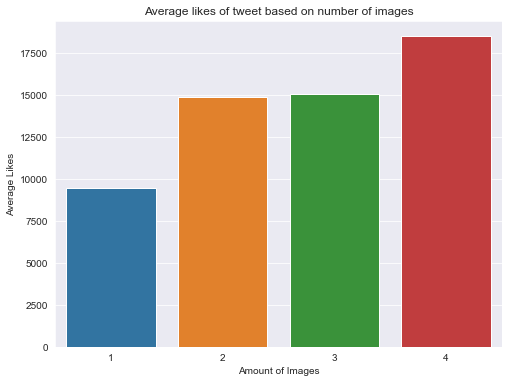

In [112]:
x = [1, 2, 3, 4]
average_likes = [avg_1_img, avg_2_img, avg_3_img, avg_4_img]

plt.figure(figsize=(8, 6))

sns.set_style('darkgrid')

sns.barplot(x=x, y=average_likes)
plt.xlabel('Amount of Images')
plt.ylabel('Average Likes')
plt.title('Average likes of tweet based on number of images')

plt.show();

### Does higher rating from the WeRateDogs result in more retweets and favorites?

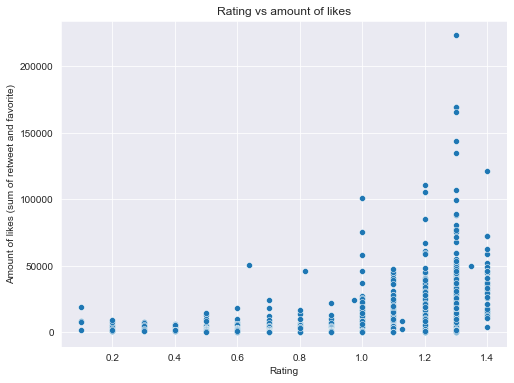

In [115]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data = twitter_archive_master, x = 'rating', y = 'likes')

plt.xlabel('Rating')
plt.ylabel('Amount of likes (sum of retweet and favorite)')
plt.title('Rating vs amount of likes')

plt.show()

### What is the most popular identified dog breed rated by WeRateDogs?

In [126]:
highest_rating = twitter_archive_master[twitter_archive_master.rating == twitter_archive_master.rating.max()]
highest_rating = highest_rating[highest_rating.p1_dog]

In [140]:
highest_rating.p1.value_counts()

pembroke                   4
french_bulldog             2
golden_retriever           2
irish_setter               1
rottweiler                 1
chihuahua                  1
samoyed                    1
standard_poodle            1
black-and-tan_coonhound    1
gordon_setter              1
pomeranian                 1
eskimo_dog                 1
bedlington_terrier         1
bloodhound                 1
Name: p1, dtype: int64

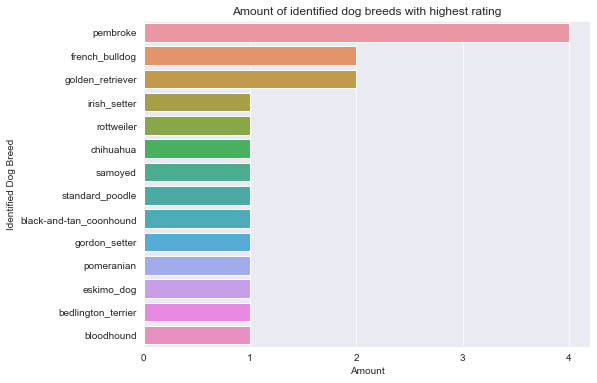

In [150]:
plt.figure(figsize=(8, 6))

sns.countplot(y=highest_rating.p1, order=highest_rating.p1.value_counts().index)
plt.xlabel('Amount')
plt.ylabel('Identified Dog Breed')
plt.title('Amount of identified dog breeds with highest rating')

plt.xticks(np.arange(5))
plt.show();

<a id='conclusion'></a>
## Conclusion

- Insight #1: Average rating for dogs is 10.54/10
- Insight #2: More images will result in more likes (retweets and favorites)
- Insight #3: Higher rating dogs tend to have more likes (retweets and favorites)
- Insight #4: The highest rating machine-identified dog breed by WeRateDogs is Pembroke.